# ch2. 사이킷런으로 시작하는 머신러닝

## 01 사이킷런 소개와 특징

사이킷런(scikit-learn)은 파이썬 기반의 머신러닝 라이브러리 중 가장 대표 라이브러리이다.

In [1]:
import sklearn

In [2]:
#사이킷런의 버전확인
print(sklearn.__version__)

1.0.2


## 02 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

붓꽃 데이터세트로 붓꽃의 품종을 분류(classification)해보자.

classification(분류)는 대표적인 supervised-learning(지도학습)의 예이다.

supervised-learning은 레이블(정답값)이 있는 데이터들을 모델에게 학습시킨다.

sklearn.model_selection은

데이터를 train과 test 데이터로 split시키고,

최적의 하이퍼파라미터로 모델을 만들기 위한 다양한 모듈을 제공한다.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

#붓꽃 데이터 세트를 로딩
iris = load_iris()

#iris.data는 Iris 데이터 세트에서 피쳐만으로 된 데이터를 numpy로 가지고 있음. 
iris_data = iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
#train_test_split()메서드를 이용해 20%의 test 데이터 생성
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)

In [6]:
#DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

#모델의 학습은 fit() 메서드.
#fit()메서드의 인자로 train 데이터의 피쳐들과 정답값을 주고 학습시킴.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [7]:
#모델이 학습하지 않은 test 데이터에 대해 에측 수행 
pred = dt_clf.predict(X_test)

In [8]:
#모델이 예측을 잘 수행했는지 파악하기 위해, 모델 성능 평가(accuracy_score정확도 선택)
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


## 03 사이킷런 기반 프레임워크 익히기

모든 사이킷런 클래스는 fit()과 predict()만으로 학습/예측을 수행한다.

Estimator: classifier와 regressor를 합해서 Estimator라고 부른다.

지도학습의 모든 알고리즘을 구현한 클래스를 통칭.

비지도학습인 PCA, clustering와 feature extraction 등을 구현한 클래스는 대부분 fit()과 transform()을 적용한다.

fit()은 학습X, input 데이터의 형태에 맞춰 데이터를 변환하는 것.

transform()이 실제 작업 수행.

fit_transform()도 있으나 이는 주의가 필요함.

In [9]:
from sklearn.datasets import load_iris
iris_data = load_iris()
type(iris_data)

sklearn.utils.Bunch

In [10]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
type(iris_data.target)

numpy.ndarray

In [12]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

## 04 Model Selection 모듈 소개

사이킷런의 model_selection 모듈은

* train/test 데이터 세트의 분리
* 교차검증 분할 및 평가
* Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공한다.

### train_test_split()

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

#학습한 train 데이터로 예측을 수행하면, 당연히 정확도가 1이 됨.
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

In [15]:
#train 데이터로 학습
dt_clf.fit(X_train, y_train)

#본 적 없는 test 데이터로 예측
pred = dt_clf.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


### 교차 검증 (cross validation)

데이터를 train과 test 데이터로 분리한다고 해도, overfitting(과적합)에 취약할 수 있다.

* overfitting(과적합) : 모델이 train데이터를 과도하게 학습하여, train 데이터만 잘 예측하고, 새로운 데이터에 대해서는 예측성능이 과도하게 떨어지는 현상

-> test 데이터로 예측을 하면서 성능을 높이면?

고정해놓은 test 데이터에 대해서만 예측을 잘 수행하는 경우가 발생.
여전히 처음보는 데이터에 대해서는 예측성능이 떨어질 수 있음.

이러한 문제를 해결하기 위한 방법 : **교차 검증(cross validation)**

* 교차검증 : train과 test로 데이터를 분리한다고 해도, 데이터 편중이 있을 수 있기 때문에 데이터를 여러번 돌려가면서 학습/예측을 수행하는 것.

**대부분의 ML 모델의 성능평가는 교차검증 기반으로 1차 평가 후, test 데이터에 적용해 평가하는 프로세스이다.

-> 데이터를 train / validation / test 데이터로 분할.





* K Fold 교차검증

K Fold 교차검증은 데이터 세트를 k개의 데이터 폴드로 나누고, 그 중 하나를 validation 세트로 설정하여 validation set을 변경해가면서 k번만큼 학습과 수행을 반복

-> k개의 성능을 평균내서 평가결과로 반영.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체
kfold = KFold(n_splits=5)
#폴드 세트별 정확도를 담을 리스트 객체 생성
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [17]:
n_iter = 0

#KFold객체의 split() : 폴드 별 train/validation 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    #반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
#개별 validation 세트의 정확도를 평균값 도출
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


* Stratified K 폴드

Stratified KFold는 데이터가 imbalance한 레이블의 분포도를 가질 때, 개별 train/validation 세트에서 원본 데이터의 레이블 분포도를 가질 수 있도록 분류해준다.

-> 그래서 split() 메서드의 인자로 feature 데이터 뿐만 아니라, label 데이터도 넘겨준다.

In [18]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts() #세 레이블의 분포가 모두 동일함. 실험을 위해 불균형한 데이터로 바꿔줄 필요가 있음.

0    50
1    50
2    50
Name: label, dtype: int64

In [19]:
kfold = KFold(n_splits=3) #3개의 폴드세트를 생성하는 kfold 객체 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    
#각각의 세트들은 0 or 1 or 2의 레이블이 존재하지 않음
#매우 불균형한 레이블 분포 -> 이때 Stratified kfold를 이용

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [20]:
from sklearn.model_selection import StratifiedKFold

#3개의 폴드 세트를 생성하는 Stratified kfold 객체 생성, 
skf = StratifiedKFold(n_splits=3)
n_iter=0

#원본 데이터의 레이블 분포를 따르기 위해 label을 인자로 넣어줘야함.
for train_index, test_index in skf.split(iris_df, iris_df['label']):  
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [21]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

#StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    #split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    #반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
#교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


* **cross_val_score( )**

cross_val_score()는 사이킷런에서 제공하는 교차 검증을 조금 더 편리하게 해주는 API이다.

-> cross_val_score(estimator, X, y, scoring, cv) 안의 변수들이 주요 파라미터들이다.

* estimator : classifier 또는 regressor
* X : feature 데이터
* y : label 데이터
* scoring : 성능평가에 사용할 평가지표
* cv : 교차검증을 위해 분할할 폴드 수

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

#성능 지표로 accuracy 사용, 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy', cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


* GridSearchCV

교차검증을 수행하면서, 동시에 최적의 하이퍼 파라미터를 찾을 수 있도록 튜닝을 해주는 방법.

GridSearchCV의 인자
* estimator : classifier 또는 regressor
* param_grid : 하이퍼 파라미터값 후보들, 파라미터명과 값이 딕셔너리 형태로 주어짐.
* scoring : 예측 성능 평가지표
* cv : 교차검증 시 생성할 폴드 개수
* refit : 최적의 하이퍼파라미터 값을 찾고, estimator 객체를 그 파라미터로 재학습시킴.

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#데이터를 로딩
iris = load_iris()
#iris 데이터를 train과 test 데이터로 분리, test데이터는 전체 데이터의 20%
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

#하이퍼 파라미터 튜닝을 할 parameter 후보들을 *딕셔너리*형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [24]:
import pandas as pd

#param_grid의 하이퍼 파라미터들을 3개의 train, test 세트로 나누어서 테스트를 수행하는 GridSearchCV 객체 생성. 
#refit=True이면 최적의 파라미터 설정으로 재학습시키고, 모델을 저장함.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

#GridSearchCV 객체에 fit()을 하면, train데이터로 교차검증을 수행하면서, param_grid의 하이퍼 파라미터들을 순차적으로 학습/예측/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)  #결과가 cv_results_에 저장됨.
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [25]:
#GridSearchCV의 최적 하이퍼파라미터는 best_params_에,
#               최적 하이퍼파라미터의 성능은 best_score_에 저장된다.
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [26]:
#GridSearchCV의 refit인자가 True이면, 최적의 하이퍼파라미터로 estimator 객체를 재학습시키고,
#                                     best_estimator_에 저장됨.
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_로 test 데이터에 대한 예측 수행.
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


** train 데이터를 GridSearchCV를 이용해 최적의 하이퍼 파라미터 튜닝을 하고, 다른 별도의 test 데이터로 성능을 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다.

## 05 데이터 전처리

머신러닝 알고리즘은 데이터를 기반으로 학습을 하고 예측을 수행

-> 당연히 input되는 데이터가 굉장히 중요하다!

좋은 데이터를 입력시키기 위해서, 데이터 전처리(preprocessing)과정이 필요하다.

ex) 결손값(NULL) -> 고정된 다른 값으로, 문자열값 -> 숫자형 값으로 변환과정이 필요.

## 데이터 인코딩

데이터 인코딩 방식에는 1. 레이블 인코딩 2. 원 핫 인코딩 방식이 있다.

* 레이블 인코딩(Label encoding)

레이블 인코딩은 카테고리형 피쳐 -> 숫자형 코드값으로 변환하는 인코딩 방식

사이킷런에서 label-encoding은 LabelEncoder 클래스로 구현한다.

** label encoding의 단점:

카테고리형 값들을 숫자형으로 단순히 변환하기 때문에, 특정 ML 알고리즘이 큰 숫자를 할당받은 값들에 대해서 더 중요도가 높다고 판단할 가능성이 있음.

In [27]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder 객체 생성
encoder = LabelEncoder()
#encoder 객체의 fit()과 transform() 메서드로 label 인코딩 수행.
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [28]:
#숫자들이 어떤 값을 나타내는지는 encoder 객체의 classes_속성을 통해 알 수 있음.
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [29]:
#inverse_transform()을 통해 인코딩된 값을 다시 디코딩 가능.
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


* 원-핫 인코딩(One-Hot encoding)

레이블 인코딩의 단점을 해결

원 핫 인코딩은 피쳐 값에 따라 새로운 피쳐 칼럼을 만들어 그 값에 해당하는 칼럼에만 1을 할당하고,나머지 칼럼에는 0을 표시하는 인코딩 방식

*주의할 점은,
1) input으로 2차원 데이터가 필요하다!!
2) 변환된 값이 sparse matrix 형태이므로, 이를 toarray()로 dense matrix로 변환해야 한다.

In [31]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#원 핫 인코딩 시에는 input 데이터가 2차원 array 형태여야함.
items = np.array(items).reshape(-1,1)

#원 핫 인코더 객체 생성 후 fit()과 transform()으로 숫자형으로 변환.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#변환된 값은 sparse matrix 형태이므로 toarray()로 dense matrix로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


판다스에는 원 핫 인코딩을 쉽게 지원해주는 get_dummies()가 있음.

get_dummies() : 숫자형 값으로의 변환 없이도, 바로 변환 가능.

In [32]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화

서로 다른 피쳐들의 값의 범위를 통일시켜줄 필요가 있음. -> 피쳐 스케일링

표준화 / 정규화가 있음.

1) 표준화

피쳐 각각을 (평균이 0이고 분산이 1인 가우시안 정규분포)를 가진 값으로 변환하는 것.

2) 정규화

서로 다른 피쳐들의 크기 범위를 통일하기 위해 크기를 변환해주는 것.

* StandardScaler

In [33]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [34]:
from sklearn.preprocessing import StandardScaler

#StandardScaler객체 생성
scaler = StandardScaler()
#StandardScaler 객체의 fit() 과 transform()으로 피쳐 표준화. 
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()으로 표준화된 피쳐들을 DataFrame으로 나타내기.
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

#모든 피쳐들의 평균이 0, 분산이 1에 가깝게 scaling 됨.

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [35]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 객체의 fit() 과 transform()으로 피쳐 스케일링.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

#피쳐들의 모든 값이 최소 0 ~ 최대 1 사이의 값으로 변환됨.

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


* 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

fit() : 데이터 변환을 위한 기준 정보 설정(ex 최댓값/ 최솟값 설정)

transform() : 설정된 기준 정보를 이용해 데이터 변환

fit_transform() : fit()과 transform()을 순차적으로 한 번에 적용

In [36]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
#Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [37]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [38]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

#test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [39]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


* fit_transform()

fit_transform은 fit()과 transform()을 순차적으로 한 번에 적용해주는 메서드이다.

하지만, 

fit() 메서드는 반드시 train 데이터에만 적용되어야 하므로(test 데이터도 fit()하게 되면, 두 데이터들의 스케일링 기준이 달라지기 때문) test 데이터에 대해서는 fit_transform()을 절대 사용해서는 안 된다.


주의할 점은

1. 전체 데이터 스케일링 변환 후, train/test 데이터로 분리
2. 1이 불가능하다면, test 데이터에는 절대 fit()이나 fit_transform()을 적용하지 않기. 

-> test 데이터 스케일링 ? 

train 데이터로 fit된 객체를 이용해 transform()으로 변환하기

## 2.6 사이킷런으로 수행하는 타이타닉 생존자 예측

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("C:/Users/kyw97/Downloads/titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [41]:
d = pd.read_csv("C:/Users/kyw97/Downloads/titanic_train.csv")
d.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [43]:
#fillna() 메서드로 NULL값 채우기.
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [44]:
#피쳐들의 데이터 값 분포 확인.
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [45]:
#Cabin 속성의 값에서 첫 글자만 설정.
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [46]:
#groupby로 sex별로 survived 수 확인.
titanic_df.groupby(by = ['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

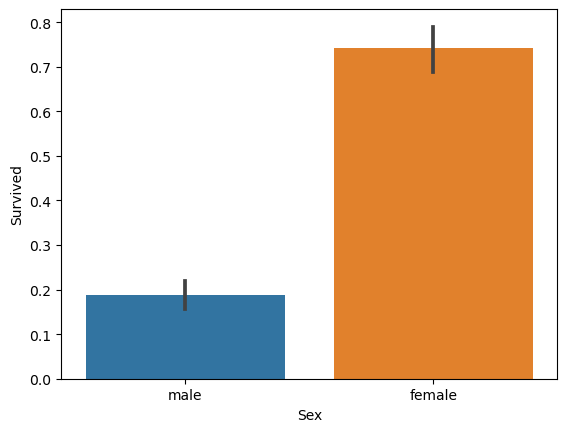

In [47]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

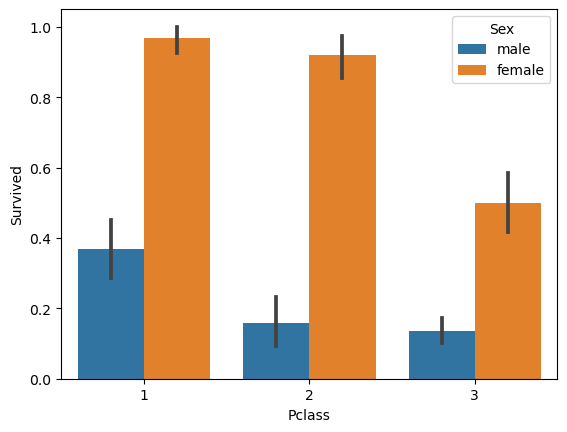

In [48]:
#hue를 설정하면, 카테고리 값의 유형에 따라 색상을 다르게 표현할 수 있음.
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

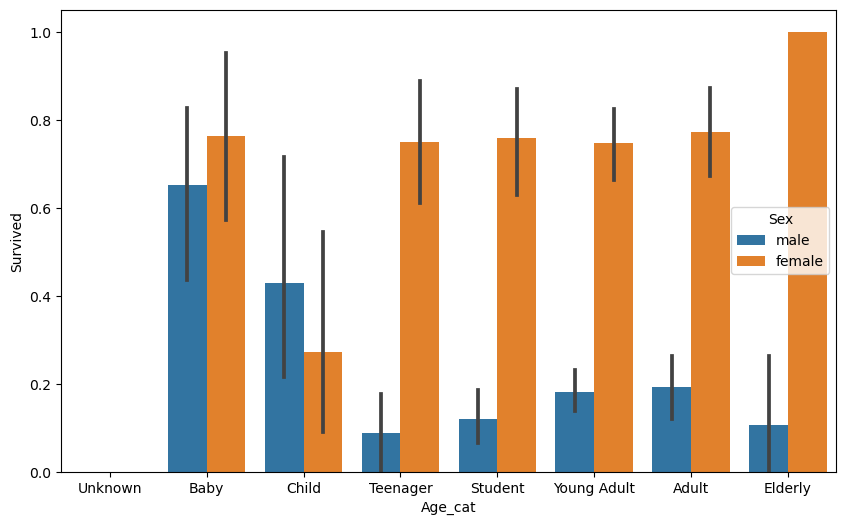

In [49]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [50]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [51]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [52]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv("C:/Users/kyw97/Downloads/titanic_train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=11)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


* KFold 이용

In [55]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


* cross_val_score() 이용

In [56]:
from sklearn.model_selection import cross_val_score

#cross_val_score로 교차검증을 간편하게 수행.
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


* GridSearchCV 이용

In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train) #파라미터 값들을 변경하면서 교차검증을 수행하며 최적의 하이퍼파라미터 값을 찾아나감.

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_) #최적의 하이퍼파라미터 값이 저장된 속성
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_)) #최적의 하이퍼파라미터 값의 성능이 저장된 속성

#refit = True가 디폴트값이기 때문에, 최적의 하이퍼 파라미터의 estimator가 best_estimator_에 저장됨.
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
